In [145]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re

In [146]:
import pandas as pd

df = pd.read_csv('/kaggle/input/credit-score-classification/train.csv', low_memory=False)
print(df.dtypes)


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [147]:
print(df.iloc[:, 26].unique())


['312.49408867943663' '284.62916249607184' '331.2098628537912' ...
 '516.8090832742814' '319.1649785257098' '393.6736955618808']


In [148]:
df[df.columns[26]] = pd.to_numeric(df[df.columns[26]], errors='coerce')
df.isetitem(26, pd.to_numeric(df.iloc[:, 26], errors='coerce'))


In [149]:
df.iloc[:, 26] = pd.to_numeric(df.iloc[:, 26], errors='coerce')


In [150]:
dtype_dict = {
    'col_name1': 'float64',
    'col_name2': 'int64',
    'col_name26': 'object'  # Example for column 26
}
df = pd.read_csv('/kaggle/input/credit-score-classification/train.csv', dtype=dtype_dict, low_memory=False)


In [151]:
print(df.isnull().sum())


ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [152]:
# Inspect unique values
print(df['Amount_invested_monthly'].unique())

# Convert to numeric, coercing errors to NaN
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Handle missing values
median_value = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median_value, inplace=True)

# Verify
print(df['Amount_invested_monthly'].dtype)
print(df['Amount_invested_monthly'].isnull().sum())


['80.41529543900253' '118.28022162236736' '81.699521264648' ...
 '24.02847744864441' '251.67258219721603' '167.1638651610451']
float64
0


In [153]:
df['Credit_History_Age'].fillna(method='ffill', inplace=True)
df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0], inplace=True)
df['Name'].fillna('Unknown', inplace=True)
df.drop(columns=['Name'], inplace=True)





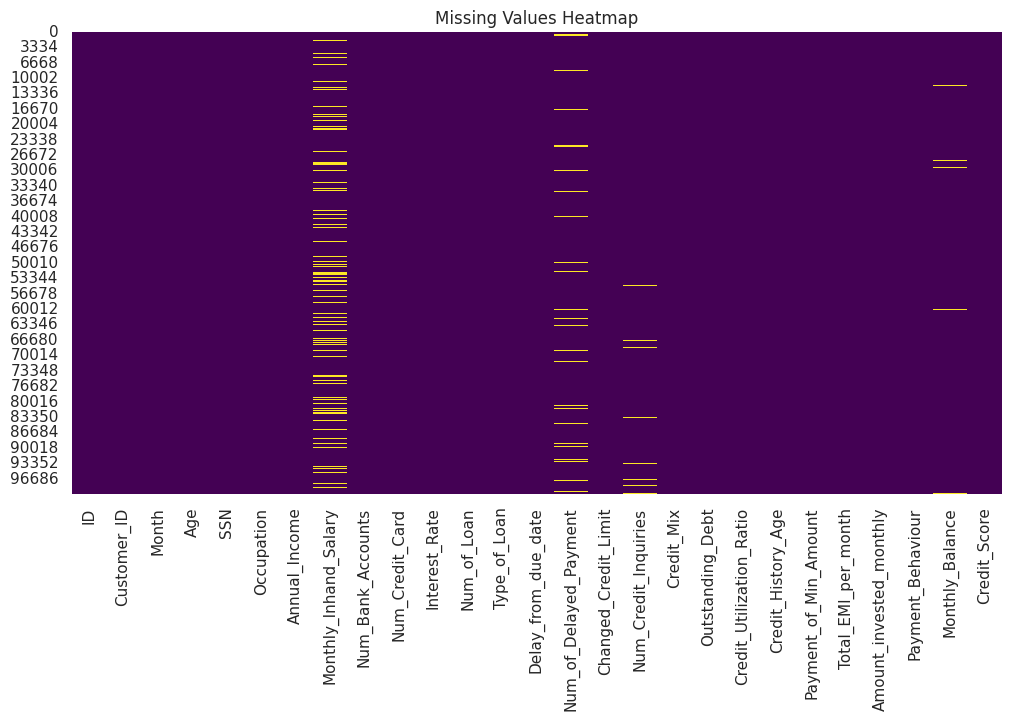

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [155]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median(), inplace=True)
print(df['Num_of_Delayed_Payment'].head())
print(df.isnull().sum())


0     7.0
1    14.0
2     7.0
3     4.0
4    14.0
Name: Num_of_Delayed_Payment, dtype: float64
ID                              0
Customer_ID                     0
Month                           0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score         

In [159]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True)
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True)


In [157]:
print(df.isnull().sum())


ID                          0
Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


# Data Understanding (EDA) and Data Selection

In [160]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [161]:
df.shape

(100000, 28)

In [162]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [163]:
# Drop the columns which are out of model scope
d_col = ['ID', 'Customer_ID', 'Month', 'SSN', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
         'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
         'Credit_Utilization_Ratio', 'Amount_invested_monthly']
drop_df = df.drop(d_col, axis=1).copy()
drop_df


,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.494089,Good
1,Aaron Maashoh,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.629162,Good
2,Aaron Maashoh,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,Aaron Maashoh,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
4,Aaron Maashoh,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Nicks,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,Nicks,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.651610,Poor
99997,Nicks,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,Nicks,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


# Replace Invalid Values to NULL

In [164]:
#Explore the NAN value in the dataset
drop_df.isnull().sum()

Name                      9985
Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
dtype: int64

In [166]:
#Drop it
drop_na = drop_df.dropna().copy()

# Transforming

In [167]:
drop_na.head(10)

,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.494089,Good
2,Aaron Maashoh,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,Aaron Maashoh,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
5,Aaron Maashoh,23,Scientist,19114.12,8,4,809.98,22 Years and 6 Months,No,49.574949,!@9#%8,340.479212,Good
6,Aaron Maashoh,23,Scientist,19114.12,3,8_,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.565317,Good
8,Rick Rothackerj,28_,_______,34847.84,3,4,605.03,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.690627,Standard
9,Rick Rothackerj,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.591214,Good
10,Rick Rothackerj,28,Teacher,34847.84_,3,-1,605.03,26 Years and 9 Months,No,18.816215,High_spent_Large_value_payments,466.466476,Standard
11,Rick Rothackerj,28,Teacher,34847.84,3,3_,605.03,26 Years and 10 Months,No,18.816215,Low_spent_Medium_value_payments,465.676224,Good
12,Rick Rothackerj,28,Teacher,34847.84,3,1,605.03,26 Years and 11 Months,No,18.816215,Low_spent_Small_value_payments,444.867032,Good


In [168]:
# Check unique for missing value or incorrect data
for i in drop_na:
  print('\n',i,drop_na[i].unique())


 Name ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Delay_from_due_date [ 3  5  8  7 10  0  4  1  9 11 -1 30 31 34 27 14 13  2 -2 16 17 15 23 22
 12 18 19 51 53 26 48 43 52 25 20 46 49 28 61 29 50 58 45  6 56 59 55 57
 54 62 67 36 41 21 24 65 33 32 39 47 42 60 64 35 44 38 -3 63 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '4' '8_' '1' '-1' '3_' '0' '8' '5' '6' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '5

In [169]:
#Drop the incorrect data
drop_na = drop_na[drop_na['Occupation'].str.contains('_______') == False]
drop_na = drop_na[drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [170]:
import pandas as pd
import re

# Define the symbols to remove
sym = "\\`*_{}[]()>#@+!$:;"

# Specify the columns with numeric values and string values
col_int = ['Age', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt',
           'Total_EMI_per_month', 'Monthly_Balance', 'Annual_Income']
col_str = ['Occupation', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Credit_Score']

# Clean the numeric columns by removing symbols and converting them to numbers
for i in col_int:
    for c in sym:
        # Replace symbols in the numeric columns
        drop_na[i] = drop_na[i].astype(str).str.replace(c, '', regex=False)  # Clean and remove symbols
    drop_na[i] = pd.to_numeric(drop_na[i], errors='coerce')  # Convert to numeric values, replacing errors with NaN

# Clean the string columns by removing symbols using re.sub()
for i in col_str:
    for c in sym:
        # Replace symbols in the string columns using re.sub to handle special characters properly
        drop_na[i] = drop_na[i].apply(lambda x: re.sub(f"[{re.escape(c)}]", "", str(x)))

# Display the cleaned data
drop_na.head()



,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.494089,Good
2,Aaron Maashoh,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,Aaron Maashoh,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
6,Aaron Maashoh,23,Scientist,19114.12,3,8,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.565317,Good
9,Rick Rothackerj,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.591214,Good


In [171]:
#Transform the information to the value
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')

In [172]:
#Transform the information to the value as level
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_na.head()

,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,3,7,809.98,22.1,No,49.574949,4,312.494089,Good
2,Aaron Maashoh,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.574949,2,331.209863,Good
3,Aaron Maashoh,23,Scientist,19114.12,5,4,809.98,22.4,No,49.574949,1,223.451310,Good
6,Aaron Maashoh,23,Scientist,19114.12,3,8,809.98,22.7,No,49.574949,1,244.565317,Good
9,Rick Rothackerj,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816215,6,484.591214,Good


In [173]:
#Transform the object data the be float data type 
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

Name                       object
Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [174]:
# Transform the target data to numerical
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Good', '3', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Standard', '2', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Poor', '1', n=-1)
drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)

drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('No', '2')
drop_na['Payment_of_Min_Amount'] = drop_na[['Payment_of_Min_Amount']].apply(pd.to_numeric)
drop_na

,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
2,Aaron Maashoh,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,Aaron Maashoh,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,Aaron Maashoh,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,Rick Rothackerj,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,Sarah McBridec,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,Nicks,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,Nicks,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,Nicks,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


In [175]:
drop_na.dtypes

Name                       object
Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score                int64
dtype: object

In [176]:
#Collect only integer in df['Age']
def extract_numeric(value):
    match = re.search(r'\d+', str(value))
    if match:
        return int(match.group())
    else:
        return None

drop_na['Age'] = drop_na['Age'].apply(extract_numeric)

In [177]:
# collect the value of df['Age'] between 0 to 150
drop_na['Age'] = drop_na['Age'].astype(int)
drop_na = drop_na[(drop_na['Age'] >= 0) & (drop_na['Age'] <= 150)]

# Drop Duplicates data

In [178]:
drop_na.count()

Name                      63589
Age                       63589
Occupation                63589
Annual_Income             63589
Delay_from_due_date       63589
Num_of_Delayed_Payment    63589
Outstanding_Debt          63589
Credit_History_Age        63589
Payment_of_Min_Amount     63589
Total_EMI_per_month       63589
Payment_Behaviour         63589
Monthly_Balance           63589
Credit_Score              63589
dtype: int64

In [179]:
drop_na = drop_na.drop_duplicates()
drop_na.count()

Name                      63589
Age                       63589
Occupation                63589
Annual_Income             63589
Delay_from_due_date       63589
Num_of_Delayed_Payment    63589
Outstanding_Debt          63589
Credit_History_Age        63589
Payment_of_Min_Amount     63589
Total_EMI_per_month       63589
Payment_Behaviour         63589
Monthly_Balance           63589
Credit_Score              63589
dtype: int64

In [180]:
drop_na.head()

,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,Aaron Maashoh,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,Aaron Maashoh,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,Rick Rothackerj,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,Rick Rothackerj,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2


# Check and Drop Outlier

In [181]:
df_cleaned = drop_na

In [182]:
df_cleaned.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,63589.000000,6.358900e+04,63589.000000,63589.000000,63589.000000,63589.000000,63589.000000,63589.000000,63589.000000,63589.000000,63589.000000
mean,33.349856,1.777644e+05,21.087374,31.485556,1425.907426,18.360334,1.237494,1413.286982,3.248581,401.624392,1.888550
std,10.825317,1.448265e+06,14.876262,229.484110,1154.554031,8.301826,0.647885,8315.184611,1.846808,212.966931,0.674894
min,14.000000,7.005930e+03,-5.000000,-3.000000,0.230000,0.100000,0.000000,0.000000,1.000000,0.007760,1.000000
25%,24.000000,1.949184e+04,10.000000,9.000000,566.050000,12.100000,1.000000,30.506517,1.000000,270.536975,1.000000
50%,33.000000,3.760504e+04,18.000000,14.000000,1164.350000,18.110000,1.000000,69.432733,3.000000,336.731225,2.000000
75%,42.000000,7.305294e+04,28.000000,18.000000,1945.030000,25.100000,2.000000,161.844011,5.000000,468.238374,2.000000
max,142.000000,2.419806e+07,67.000000,4397.000000,4998.070000,33.800000,2.000000,82331.000000,6.000000,1602.040519,3.000000


In [183]:
# Drop outlier by IQR calculation
Q1 = df_cleaned.Annual_Income.quantile(0.25)
Q3 = df_cleaned.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_cleaned

,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,Aaron Maashoh,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,Aaron Maashoh,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,Rick Rothackerj,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,Rick Rothackerj,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,Sarah McBridec,29,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,Nicks,25,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,Nicks,25,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,Nicks,25,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


<Axes: xlabel='Annual_Income'>

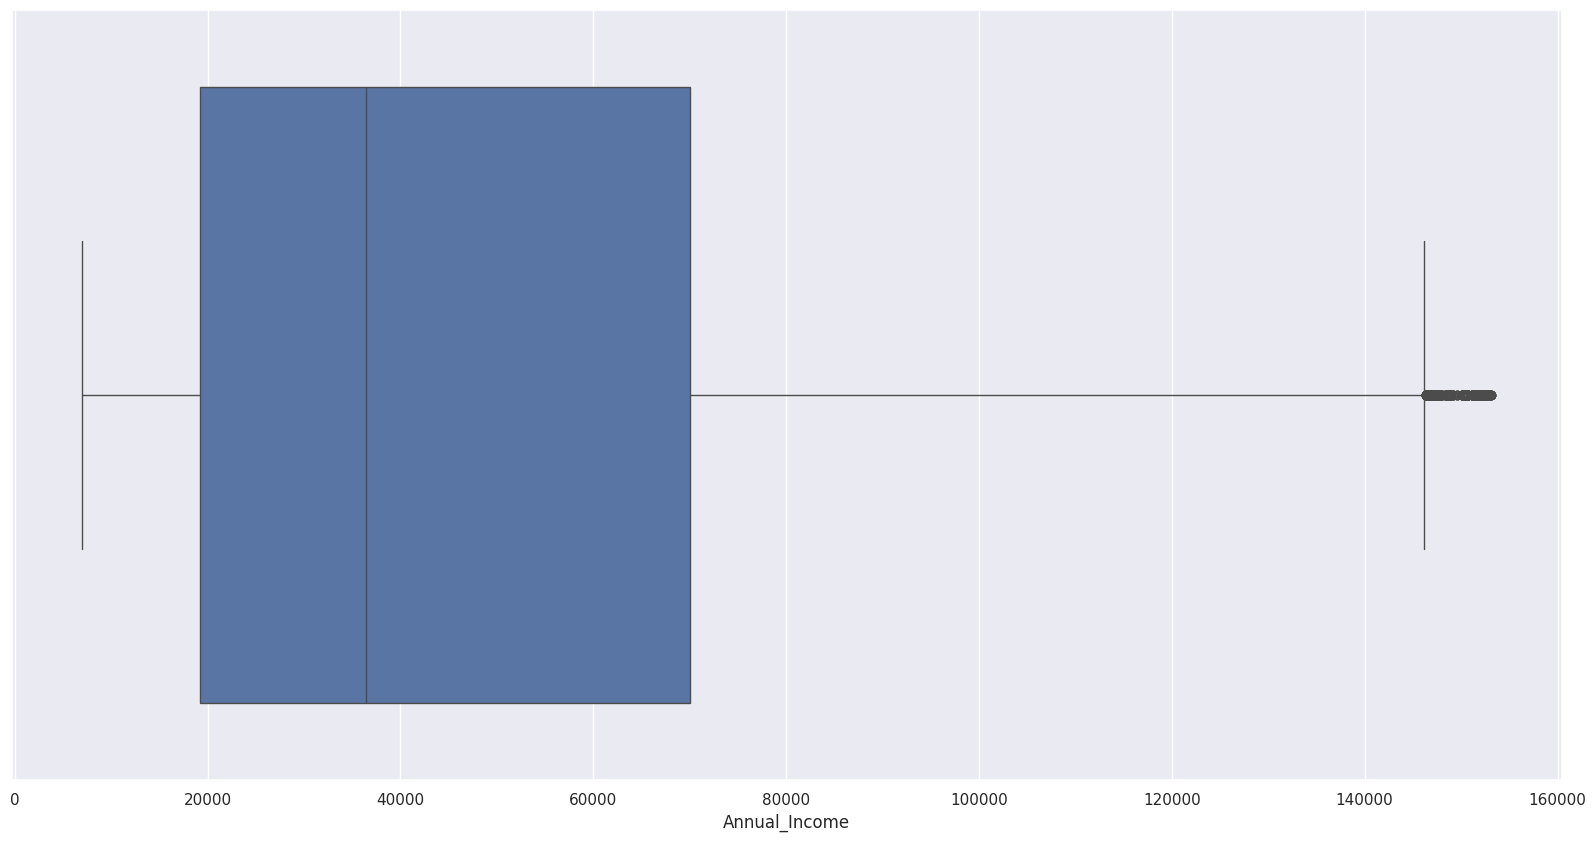

In [184]:
sns.boxplot(x=df_cleaned['Annual_Income'])

<Axes: xlabel='Outstanding_Debt'>

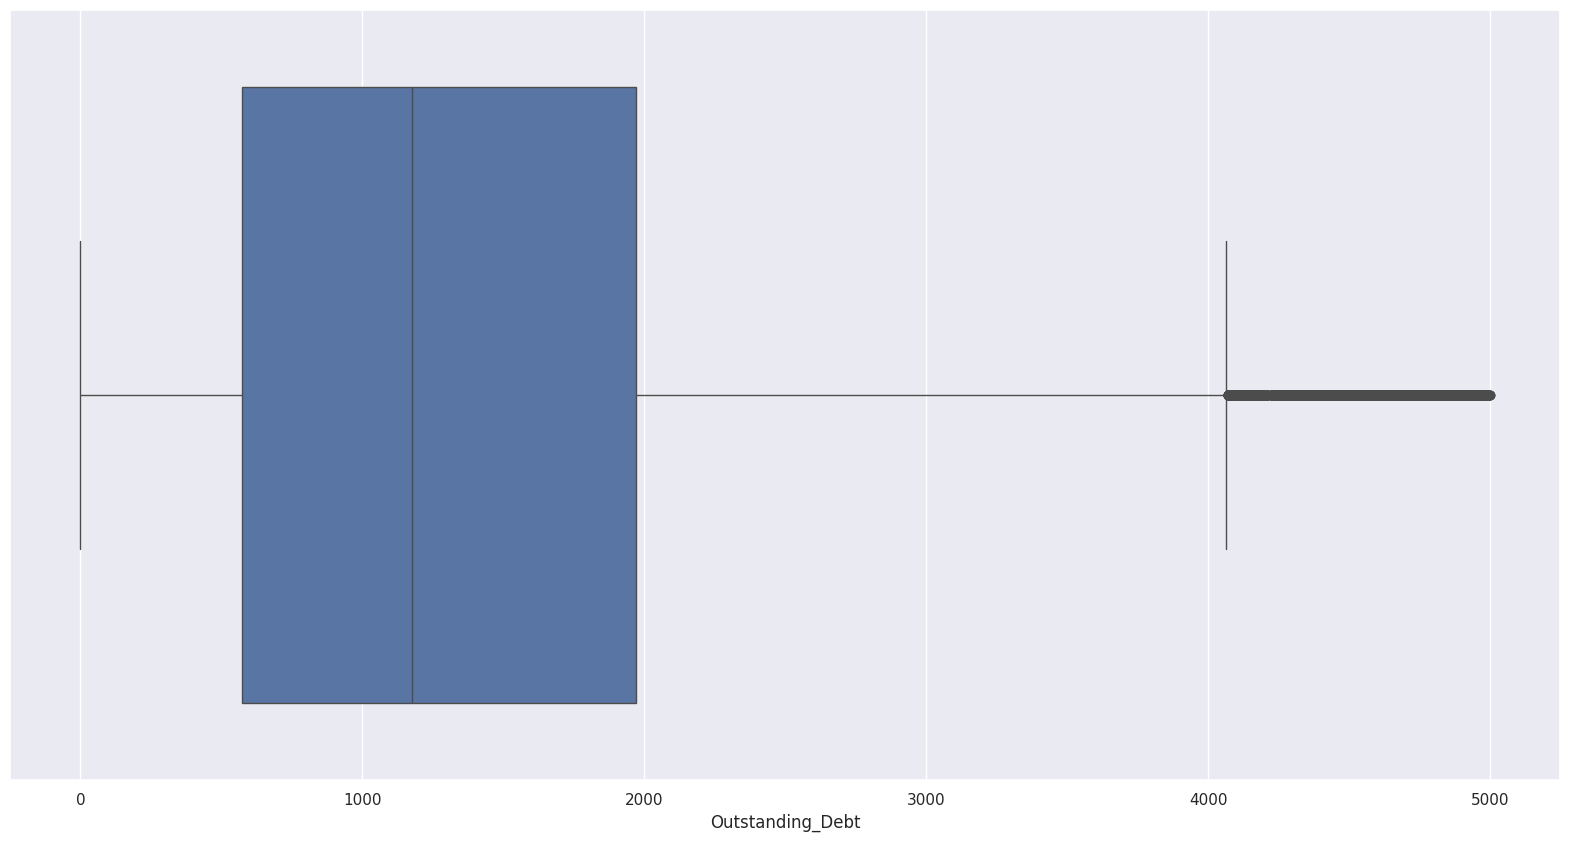

In [185]:
sns.boxplot(x=df_cleaned['Outstanding_Debt'])

# Checking data

In [186]:
### Balancing - Occupation
occupation_count = df_cleaned['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer          4325
Mechanic        4234
Teacher         4224
Engineer        4216
Accountant      4170
Architect       4170
Scientist       4168
Entrepreneur    4134
MediaManager    4117
Developer       4097
Journalist      4078
Doctor          4039
Musician        3977
Manager         3946
Writer          3938
Name: Occupation, dtype: int64

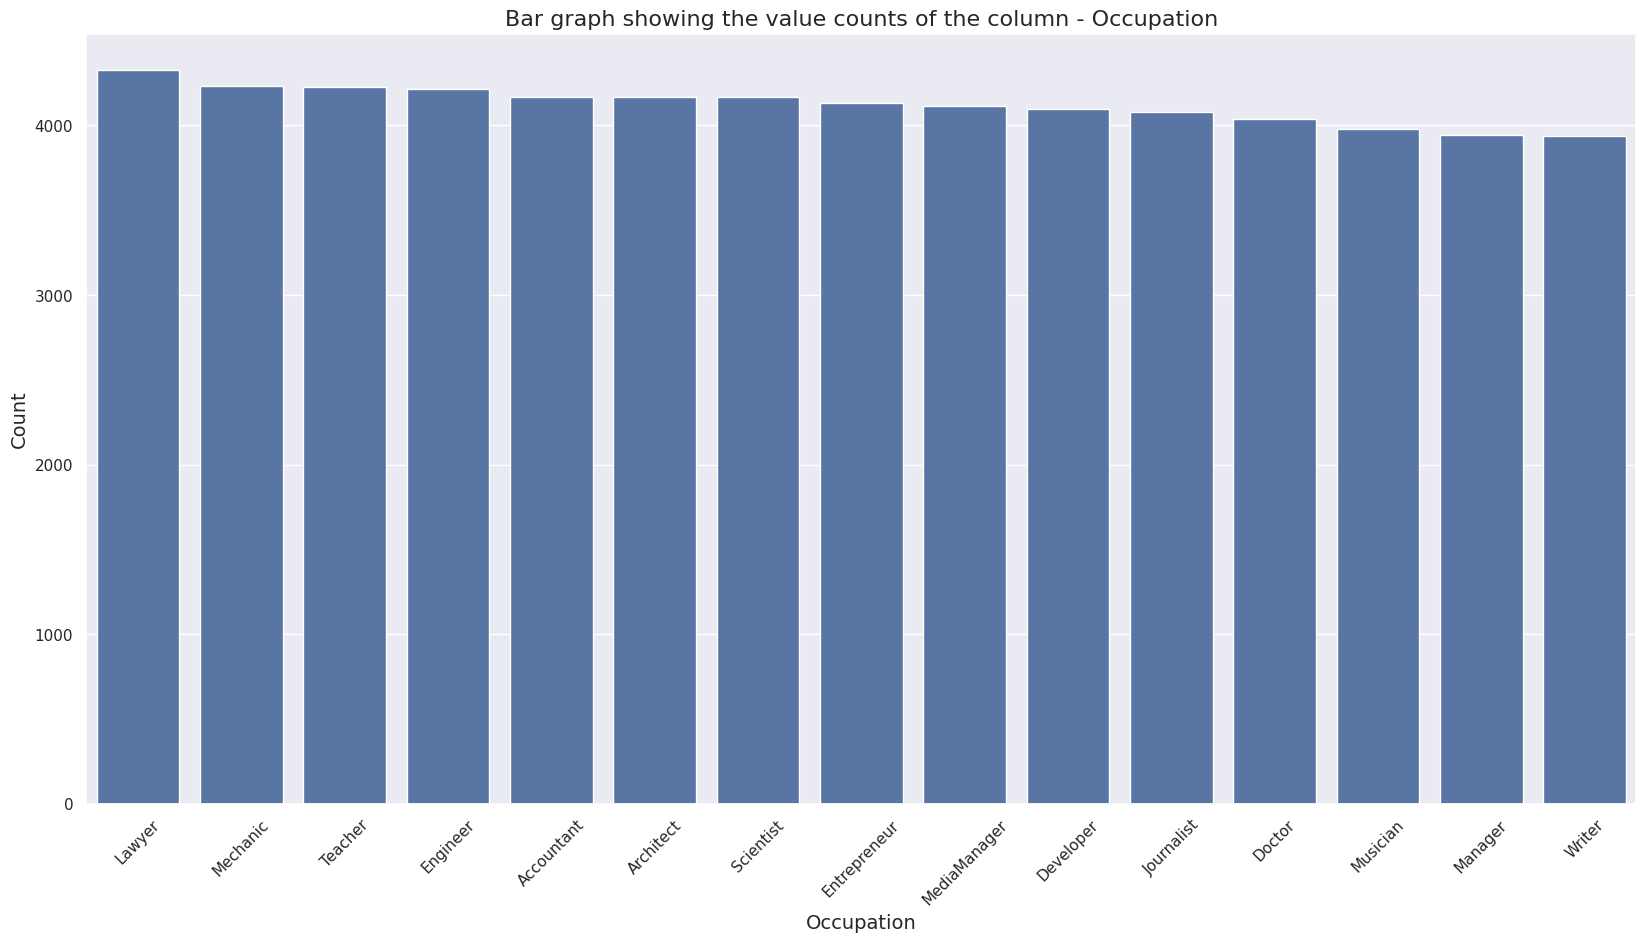

In [187]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()


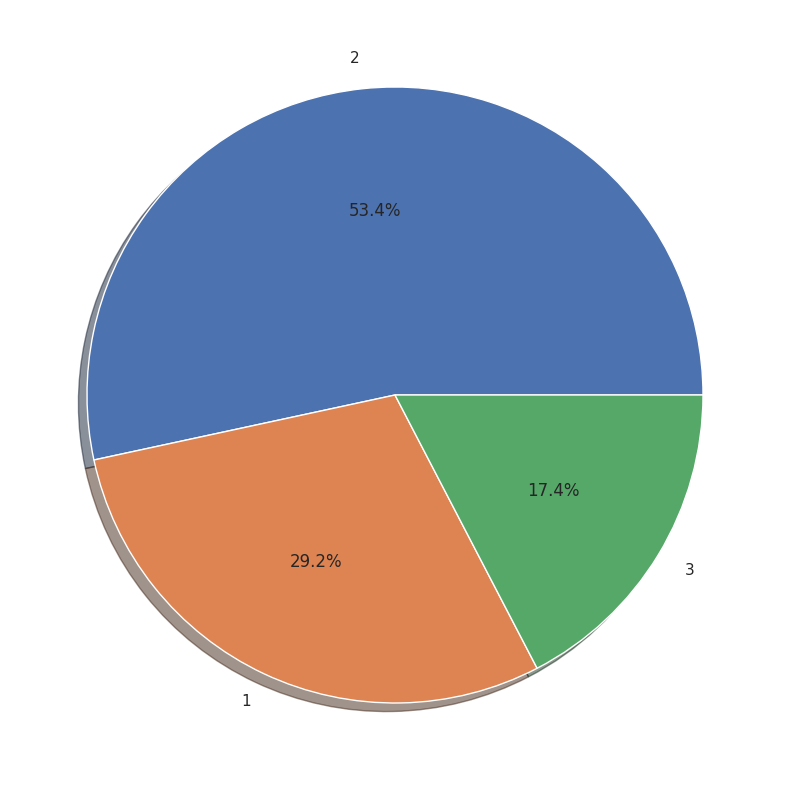

In [188]:
# Explore data balance
label = df_cleaned.Credit_Score.value_counts().index
label_count = df_cleaned.Credit_Score.value_counts().values
plt.pie(data=df_cleaned, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.093426,-0.173927,0.001472,-0.202807,0.233584,0.187077,-0.000615,0.031619,0.116843,0.161631
Annual_Income,0.093426,1.000000,-0.227683,0.003176,-0.262807,0.257273,0.179458,0.009904,0.312201,0.671168,0.196529
Delay_from_due_date,-0.173927,-0.227683,1.000000,0.011742,0.570690,-0.485656,-0.332865,-0.006258,-0.079536,-0.265128,-0.429241
Num_of_Delayed_Payment,0.001472,0.003176,0.011742,1.000000,0.008939,-0.009353,-0.007228,-0.001624,0.004000,-0.001930,-0.007463
Outstanding_Debt,-0.202807,-0.262807,0.570690,0.008939,1.000000,-0.627644,-0.323947,-0.006863,-0.096639,-0.313170,-0.384490
Credit_History_Age,0.233584,0.257273,-0.485656,-0.009353,-0.627644,1.000000,0.384643,0.006736,0.090903,0.317235,0.385631
Payment_of_Min_Amount,0.187077,0.179458,-0.332865,-0.007228,-0.323947,0.384643,1.000000,-0.001290,0.063200,0.205595,0.287064
Total_EMI_per_month,-0.000615,0.009904,-0.006258,-0.001624,-0.006863,0.006736,-0.001290,1.000000,0.002974,0.002399,0.006540
Payment_Behaviour,0.031619,0.312201,-0.079536,0.004000,-0.096639,0.090903,0.063200,0.002974,1.000000,0.543542,0.113780
Monthly_Balance,0.116843,0.671168,-0.265128,-0.001930,-0.313170,0.317235,0.205595,0.002399,0.543542,1.000000,0.196294


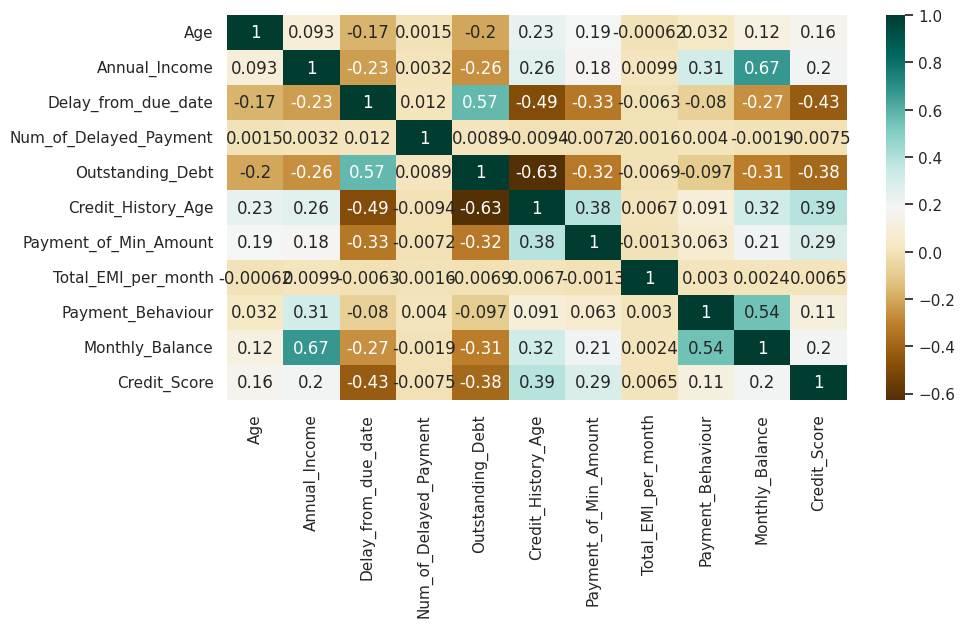

In [190]:

# Calculate the correlation matrix while avoiding the FutureWarning
c = df_cleaned.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="BrBG", annot=True)

# Display the correlation matrix
c


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Payment_Behaviour'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>,
        <Axes: title={'center': 'Credit_Score'}>, <Axes: >]], dtype=object)

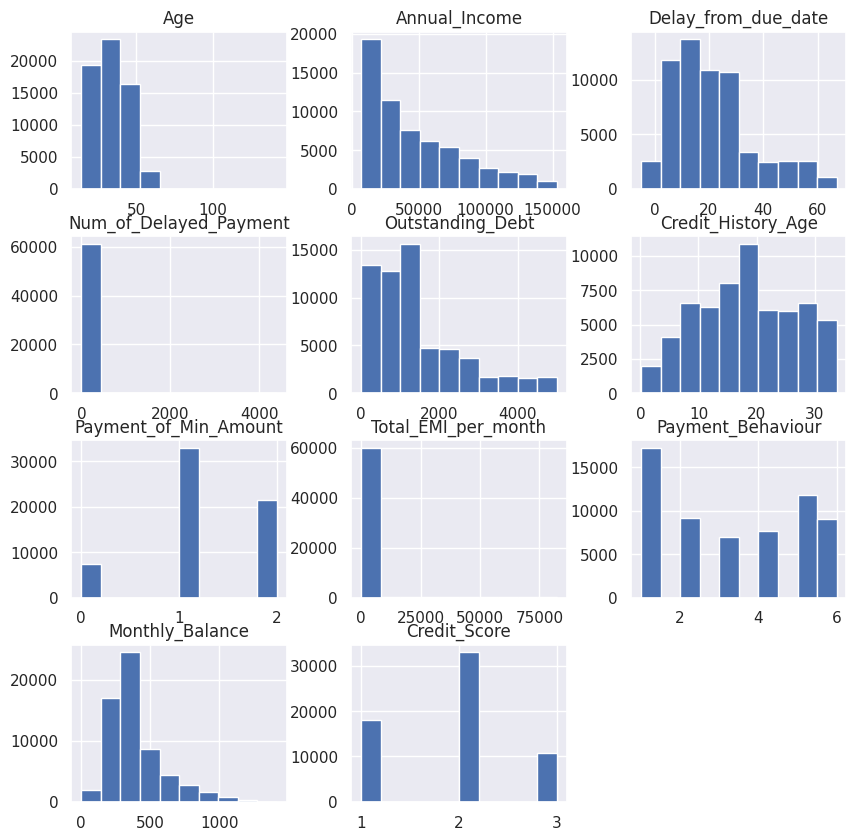

In [191]:
df_cleaned.hist(figsize=(10, 10))

# Normalization

In [192]:
df_cleaned.head()

,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,Aaron Maashoh,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,Aaron Maashoh,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,Rick Rothackerj,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,Rick Rothackerj,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2


In [193]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()

,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,Aaron Maashoh,0.070312,Scientist,0.082852,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,0.220751,3
3,Aaron Maashoh,0.070312,Scientist,0.082852,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,0.157848,3
6,Aaron Maashoh,0.070312,Scientist,0.082852,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,0.172764,3
9,Rick Rothackerj,0.109375,Teacher,0.190513,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,0.342327,3
10,Rick Rothackerj,0.109375,Teacher,0.190513,0.111111,0.000455,0.121012,0.795252,2,0.000229,6.0,0.329523,2


# Encoding

In [194]:
df_cleaned.columns

Index(['Name', 'Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [195]:
df_cleaned = pd.get_dummies(df_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cleaned.head()

,Name,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,Aaron Maashoh,0.070312,0.082852,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,...,0,0,0,0,0,0,0,1,0,0
3,Aaron Maashoh,0.070312,0.082852,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,...,0,0,0,0,0,0,0,1,0,0
6,Aaron Maashoh,0.070312,0.082852,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,...,0,0,0,0,0,0,0,1,0,0
9,Rick Rothackerj,0.109375,0.190513,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,...,0,0,0,0,0,0,0,0,1,0
10,Rick Rothackerj,0.109375,0.190513,0.111111,0.000455,0.121012,0.795252,2,0.000229,6.0,...,0,0,0,0,0,0,0,0,1,0


In [196]:
# Check all column names in df_cleaned
print(df_cleaned.columns)


Index(['Name', 'Age', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer'],
      dtype='object')


In [197]:
# Select the columns with the corrected name
feed = df_cleaned[['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_MediaManager',  # Corrected name
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']]


In [198]:
df_train_x = feed.drop('Credit_Score',axis = 1)
df_train_y = feed['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.15, random_state=72)

# Modeling

In [199]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Fit the DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

# Predict the labels
y_pred = dtree.predict(x_test)

# Calculate confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Create a DataFrame for better visualization of confusion matrix
cm_df = pd.DataFrame(cm, 
                     index=['Class 0', 'Class 1', 'Class 2'], 
                     columns=['Predicted Class 0', 'Predicted Class 1', 'Predicted Class 2'])

# Print confusion matrix and accuracy neatly
print("Confusion Matrix:")
print(cm_df)
print("\nAccuracy: {:.4f}".format(accuracy))


Confusion Matrix:
         Predicted Class 0  Predicted Class 1  Predicted Class 2
Class 0               1782                826                 83
Class 1                794               3570                610
Class 2                 90                580                940

Accuracy: 0.6784


In [203]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Fit the KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

# Predict the labels
kn_y_pred = kn.predict(x_test)

# Calculate confusion matrix and accuracy
kn_cm = confusion_matrix(y_test, kn_y_pred)
kn_accuracy = accuracy_score(y_test, kn_y_pred)

# Create a DataFrame for better visualization of confusion matrix
kn_cm_df = pd.DataFrame(kn_cm, 
                        index=['Class 0', 'Class 1', 'Class 2'], 
                        columns=['Predicted Class 0', 'Predicted Class 1', 'Predicted Class 2'])

# Print confusion matrix and accuracy neatly
print("Confusion Matrix:")
print(kn_cm_df)
print("\nAccuracy: {:.4f}".format(kn_accuracy))


Confusion Matrix:
         Predicted Class 0  Predicted Class 1  Predicted Class 2
Class 0               1585               1005                101
Class 1                979               3501                494
Class 2                158                842                610

Accuracy: 0.6141


In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Initialize and fit the RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=1,
    max_features='sqrt'
)
rf.fit(x_train, y_train)

# Predict using the trained model
rf_y_pred = rf.predict(x_test)

# Calculate confusion matrix and accuracy
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Create a DataFrame for better visualization of confusion matrix
rf_cm_df = pd.DataFrame(rf_cm, 
                        index=['Class 0', 'Class 1', 'Class 2'], 
                        columns=['Predicted Class 0', 'Predicted Class 1', 'Predicted Class 2'])

# Print confusion matrix and accuracy neatly
print("Confusion Matrix:")
print(rf_cm_df)
print("\nAccuracy: {:.4f}".format(rf_accuracy))


Confusion Matrix:
         Predicted Class 0  Predicted Class 1  Predicted Class 2
Class 0               2075                576                 40
Class 1                578               4093                303
Class 2                 15                580               1015

Accuracy: 0.7744


# Run the model to Test data

In [205]:
test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [206]:
test = test.dropna().copy()

In [207]:
#Drop the column which is out of model scope
test_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_test = test.drop(d_col , axis=1).copy()
drop_test

,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,Aaron Maashoh,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.574949,Low_spent_Small_value_payments,186.26670208571772
1,Aaron Maashoh,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.574949,High_spent_Medium_value_payments,361.44400385378196
4,Rick Rothackerj,28,_______,34847.84,3,1,605.03,27 Years and 3 Months,No,18.816215,High_spent_Large_value_payments,485.2984336755923
5,Rick Rothackerj,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816215,Low_spent_Large_value_payments,303.3550833433617
7,Rick Rothackerj,28,Teacher,34847.84,3,2_,605.03,27 Years and 6 Months,No,18.816215,!@9#%8,421.44796447960783
...,...,...,...,...,...,...,...,...,...,...,...,...
49992,Sarah McBridec,29,Architect,20002.88,33,25,3571.7,6 Years and 4 Months,Yes,60.964772,Low_spent_Small_value_payments,314.8151526456419
49993,Sarah McBridec,29,Architect,20002.88,33,25,3571.7,6 Years and 5 Months,Yes,60.964772,Low_spent_Small_value_payments,350.23147346441687
49994,Sarah McBridec,29,_______,20002.88,33,22,3571.7,6 Years and 6 Months,Yes,60.964772,High_spent_Small_value_payments,341.179047488264
49997,Nicks,25,Mechanic,39628.99,23,5,502.38,32 Years and 0 Months,No,35.104023,Low_spent_Large_value_payments,349.7263321025098


In [208]:
#Drop the incorrect data
drop_test = drop_test[drop_test['Occupation'].str.contains('_______') == False]
drop_test = drop_test[drop_test['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [209]:
# Define special characters
sym = "\\`*_{}[]()>#@+!$:;"

# Define the integer and string columns
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount']

# Clean the integer columns by removing special characters
for i in col_int:
    for c in sym:
        drop_test[i] = drop_test[i].astype(str).str.replace(c, '', regex=False)  # Added regex=False

# Clean the string columns by removing special characters
for i in col_str:
    for c in sym:
        drop_test[i] = drop_test[i].replace(c, '', regex=False)  # Added regex=False

# Display the cleaned dataframe
drop_test.head()


,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,Aaron Maashoh,23,Scientist,19114.12,3,7,809.98,22 Years and 9 Months,No,49.57494921489417,Low_spent_Small_value_payments,186.26670208571772
1,Aaron Maashoh,24,Scientist,19114.12,3,9,809.98,22 Years and 10 Months,No,49.57494921489417,High_spent_Medium_value_payments,361.44400385378196
5,Rick Rothackerj,28,Teacher,34847.84,3,3,605.03,27 Years and 4 Months,No,18.816214573128885,Low_spent_Large_value_payments,303.3550833433617
9,Langep,35,Engineer,143162.64,6,3,1303.01,18 Years and 6 Months,No,246.9923194537421,Low_spent_Large_value_payments,788.1145499681528
12,Jasond,55,Entrepreneur,30689.89,5,6,632.46,17 Years and 11 Months,No,16.415451659824875,High_spent_Medium_value_payments,425.7266258262577


In [210]:
#Transform the information to the value
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_test['Credit_History_Age'] = drop_test['Credit_History_Age'].astype(str).str.replace('Months','')

In [211]:
#Transform the information to the value as level
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_test['Payment_Behaviour'] = drop_test['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_test.head()

,Name,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,Aaron Maashoh,23,Scientist,19114.12,3,7,809.98,22.9,No,49.57494921489417,1,186.26670208571772
1,Aaron Maashoh,24,Scientist,19114.12,3,9,809.98,22.10,No,49.57494921489417,5,361.44400385378196
5,Rick Rothackerj,28,Teacher,34847.84,3,3,605.03,27.4,No,18.816214573128885,3,303.3550833433617
9,Langep,35,Engineer,143162.64,6,3,1303.01,18.6,No,246.9923194537421,3,788.1145499681528
12,Jasond,55,Entrepreneur,30689.89,5,6,632.46,17.11,No,16.415451659824875,5,425.7266258262577


In [212]:
#Transform the object data the be float data type 
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_test[i] = drop_test[i].astype(float)
drop_test.dtypes

Name                       object
Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
dtype: object

In [213]:
# Transform the target data to numerical
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_test['Payment_of_Min_Amount'] = drop_test['Payment_of_Min_Amount'].str.replace('No', '2')
drop_test['Payment_of_Min_Amount'] = drop_test[['Payment_of_Min_Amount']].apply(pd.to_numeric)

In [214]:
drop_test = pd.get_dummies(drop_test, prefix='Occupation', columns=['Occupation'], drop_first=False)
drop_test.head()

,Name,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,Aaron Maashoh,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,...,0,0,0,0,0,0,0,1,0,0
1,Aaron Maashoh,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,...,0,0,0,0,0,0,0,1,0,0
5,Rick Rothackerj,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,...,0,0,0,0,0,0,0,0,1,0
9,Langep,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,...,0,0,0,0,0,0,0,0,0,0
12,Jasond,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,...,1,0,0,0,0,0,0,0,0,0


In [215]:
df_cleaned.columns

Index(['Name', 'Age', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer'],
      dtype='object')

In [216]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61833 entries, 0 to 99997
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     61833 non-null  object 
 1   Age                      61833 non-null  float64
 2   Annual_Income            61833 non-null  float64
 3   Delay_from_due_date      61833 non-null  float64
 4   Num_of_Delayed_Payment   61833 non-null  float64
 5   Outstanding_Debt         61833 non-null  float64
 6   Credit_History_Age       61833 non-null  float64
 7   Payment_of_Min_Amount    61833 non-null  int64  
 8   Total_EMI_per_month      61833 non-null  float64
 9   Payment_Behaviour        61833 non-null  float64
 10  Monthly_Balance          61833 non-null  float64
 11  Credit_Score             61833 non-null  int64  
 12  Occupation_Accountant    61833 non-null  uint8  
 13  Occupation_Architect     61833 non-null  uint8  
 14  Occupation_Developer  

In [217]:
drop_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22703 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      22703 non-null  object 
 1   Age                       22703 non-null  float64
 2   Annual_Income             22703 non-null  float64
 3   Delay_from_due_date       22703 non-null  float64
 4   Num_of_Delayed_Payment    22703 non-null  float64
 5   Outstanding_Debt          22703 non-null  float64
 6   Credit_History_Age        22703 non-null  float64
 7   Payment_of_Min_Amount     22703 non-null  int64  
 8   Total_EMI_per_month       22703 non-null  float64
 9   Payment_Behaviour         22703 non-null  float64
 10  Monthly_Balance           22703 non-null  float64
 11  Occupation_Accountant     22703 non-null  uint8  
 12  Occupation_Architect      22703 non-null  uint8  
 13  Occupation_Developer      22703 non-null  uint8  
 14  Occupa

In [218]:
drop_test.columns

Index(['Name', 'Age', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer'],
      dtype='object')

In [219]:
drop_test

,Name,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,Aaron Maashoh,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,...,0,0,0,0,0,0,0,1,0,0
1,Aaron Maashoh,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,...,0,0,0,0,0,0,0,1,0,0
5,Rick Rothackerj,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,...,0,0,0,0,0,0,0,0,1,0
9,Langep,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,...,0,0,0,0,0,0,0,0,0,0
12,Jasond,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,Chris Wickhamm,50.0,37188.10,3.0,12.0,620.64,30.80,2,33013.000000,3.0,...,0,0,0,0,0,0,0,0,0,1
49992,Sarah McBridec,29.0,20002.88,33.0,25.0,3571.70,6.40,1,60.964772,1.0,...,0,0,0,0,0,0,0,0,0,0
49993,Sarah McBridec,29.0,20002.88,33.0,25.0,3571.70,6.50,1,60.964772,1.0,...,0,0,0,0,0,0,0,0,0,0
49997,Nicks,25.0,39628.99,23.0,5.0,502.38,32.00,2,35.104023,3.0,...,0,0,0,0,1,0,0,0,0,0


In [223]:
# Check if 'Name' column exists in drop_test before dropping it
if 'Name' in drop_test.columns:
    drop_test = drop_test.drop(columns=['Name'])

# Now rename 'Occupation_Media_Manager' to 'Occupation_MediaManager' if it exists
drop_test = drop_test.rename(columns={'Occupation_Media_Manager': 'Occupation_MediaManager'})

# Now make predictions with the cleaned data
Credit_Score = rf.predict(drop_test)

# Output the predictions
print(Credit_Score)



[2 2 2 ... 2 2 2]


In [224]:
Credit_Score = rf.predict(drop_test)

In [225]:
drop_test['Credit_Score'] = Credit_Score
drop_test

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Score
0,23.0,19114.12,3.0,7.0,809.98,22.90,2,49.574949,1.0,186.266702,...,0,0,0,0,0,0,1,0,0,2
1,24.0,19114.12,3.0,9.0,809.98,22.10,2,49.574949,5.0,361.444004,...,0,0,0,0,0,0,1,0,0,2
5,28.0,34847.84,3.0,3.0,605.03,27.40,2,18.816215,3.0,303.355083,...,0,0,0,0,0,0,0,1,0,2
9,35.0,143162.64,6.0,3.0,1303.01,18.60,2,246.992319,3.0,788.114550,...,0,0,0,0,0,0,0,0,0,2
12,55.0,30689.89,5.0,6.0,632.46,17.11,2,16.415452,5.0,425.726626,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,50.0,37188.10,3.0,12.0,620.64,30.80,2,33013.000000,3.0,257.095501,...,0,0,0,0,0,0,0,0,1,2
49992,29.0,20002.88,33.0,25.0,3571.70,6.40,1,60.964772,1.0,314.815153,...,0,0,0,0,0,0,0,0,0,2
49993,29.0,20002.88,33.0,25.0,3571.70,6.50,1,60.964772,1.0,350.231473,...,0,0,0,0,0,0,0,0,0,2
49997,25.0,39628.99,23.0,5.0,502.38,32.00,2,35.104023,3.0,349.726332,...,0,0,0,1,0,0,0,0,0,2
